# PHYS 225
## Intro to Computational Physics
### 10-4-2019

## Warm-up

1. Get out a piece of paper.
1. Solve this problem

A point charge $q$ is at the center of a cube. 

What is the electric flux through a single side of the cube?

# Outline

* 3D plotting example
* Using `meshgrid()` to evaluate vector functions
* Plotting vector fields in Matplotlib
* Calculating area using `meshgrid`
* Calculating flux using `meshgrid`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create a plot of a magnetic field around a wire.
The current is flowing out of the page. 
$$|\vec{B}| = \frac{\mu_0 I}{2\pi r}$$

$$B_x = -\frac{\mu_0 I}{2\pi}\frac{y}{r^2}$$

$$B_y = \frac{\mu_0 I}{2\pi}\frac{x}{r^2}$$


In [ ]:
# Use `meshgrid` to calculate the magnetic field

In [5]:
from scipy.constants import mu_0   # import magnetic permeability
I = 1  # current in amps

# Define plot ranges  (+-10 cm from wire)
xrange = np.linspace(-0.1, 0.1, 20)
yrange = np.linspace(-0.1, 0.1, 20)
X, Y = np.meshgrid(xrange, yrange)

const = mu_0/(2*np.pi)
R = (X**2 + Y**2)**0.5
Bx = -const * Y / R**2
By = const * X / R**2

Text(0.5, 1.0, 'Magnetic field around a wire')

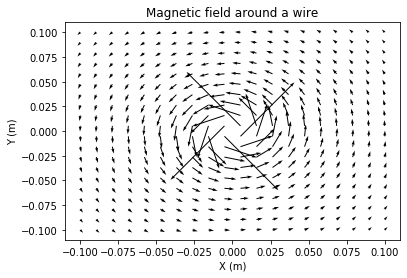

In [7]:
%matplotlib inline

plt.quiver(X, Y, Bx, By  )

# add labels and title
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Magnetic field around a wire")

Text(0.5, 1.0, 'Magnetic field around a wire')

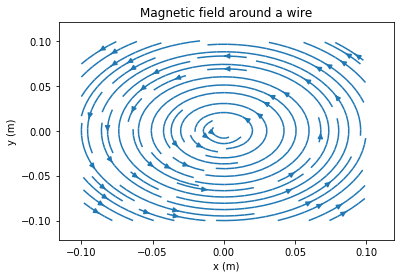

In [9]:
%matplotlib inline

plt.streamplot(X, Y, Bx, By)

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Magnetic field around a wire")

## Plotting functions in 3D

$$ f(x,y) = x^2 + y^2 $$

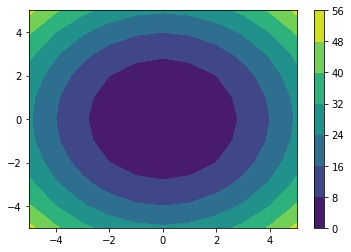

In [2]:
%matplotlib inline

# set up the meshgrids
xrange = np.linspace(-5,5,11)  # 1D array of x values
yrange = np.linspace(-5,5,11)  # 1D array of y values
X, Y = np.meshgrid(xrange, yrange)  # create 2D arrays of X and Y values


Z = X**2 + Y**2  # compute 2D array of Z values

plt.contourf(X, Y, Z)
plt.colorbar()

## Access the mplot3d toolkit
[The mplot3d toolkit tutorial](https://matplotlib.org/tutorials/toolkits/mplot3d.html) contains examples of the various plots.

In [3]:
# import the 3D plotting functions from matplotlib
from mpl_toolkits.mplot3d import Axes3D

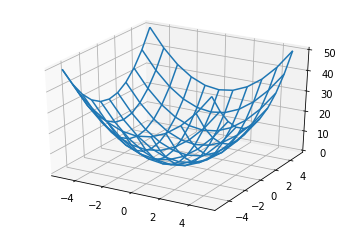

In [5]:
%matplotlib inline
# define a new 3d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the plot of the curve
ax.plot_wireframe(X,Y,Z)

# add labels to the 3D axes object
#ax.set_xlabel("X")
#ax.set_ylabel("Y")
#ax.set_zlabel("Z");

## Make a Sphere
Use spherical coordinates
<img src="519px-3D_Spherical.svg.png" alt="drawing" width="400"/>

In [11]:
# Dr Zwickl will code here
thetarange = np.linspace(0,np.pi, 7)
phirange = np.linspace(0,2*np.pi, 14)
r = 2

THETA, PHI = np.meshgrid(thetarange, phirange)
X = r*np.sin(THETA) * np.cos(PHI)
Y = r*np.sin(THETA) * np.sin(PHI)
Z = r*np.cos(THETA)


<IPython.core.display.Javascript object>


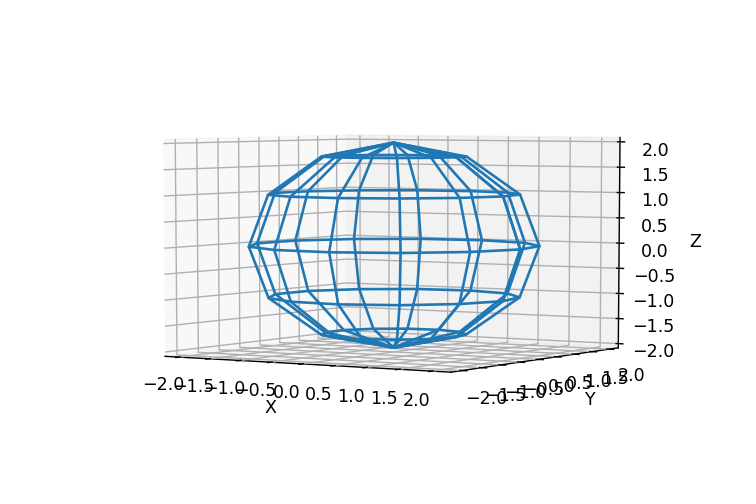

Text(0.5, 0, 'Z')

In [12]:
%matplotlib notebook

# define a new 3d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the plot
ax.plot_wireframe(X,Y,Z)

# add labels to the 3D axes object
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

## Can we make a donut?

In [17]:
# Dr Zwickl will code here
# Copy code for Sphere first

thetarange = np.linspace(0,2*np.pi, 20)
phirange = np.linspace(0,2*np.pi, 30)
donutradius = 2

THETA, PHI = np.meshgrid(thetarange, phirange)
X = (donutradius + np.sin(THETA) )* np.cos(PHI)
Y = (donutradius + np.sin(THETA) )* np.sin(PHI)
Z = np.cos(THETA)



<IPython.core.display.Javascript object>


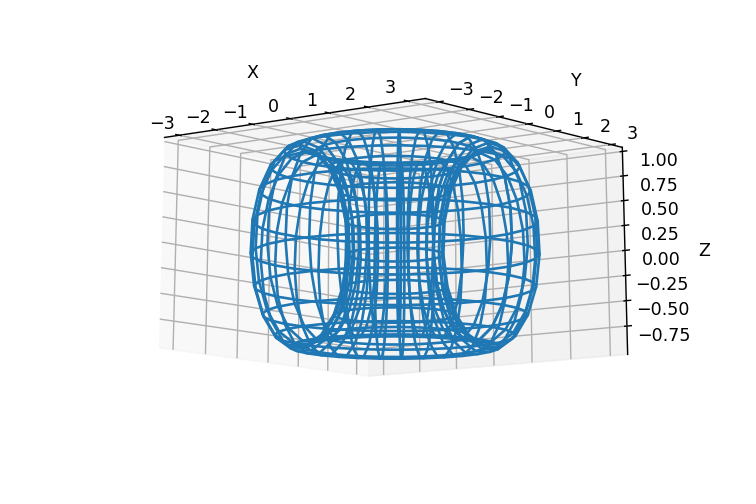

Text(0.5, 0, 'Z')

In [18]:
%matplotlib notebook

# define a new 3d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create the plot
ax.plot_wireframe(X,Y,Z)

# add labels to the 3D axes object
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Visualizing flux through a surface
A point charge is positioned at the origin, and is at the center of a cube.
The corners of the cube are the points $(-1,-1,-1)$ and $(1,1,1)$.

In [19]:
x = 1  # fixed x value (positive x face of cube)

# face is a square parallel to the yz-plane
yrange = np.linspace(-1, 1, 9)
zrange = np.linspace(-1, 1, 9)

Y, Z = np.meshgrid(yrange, zrange)

In [20]:
from scipy.constants import epsilon_0
const = 1/(4*np.pi*epsilon_0)
q = 1

R = (x**2 + Y**2 + Z**2 )**0.5  # meshgrid of r values

Ex = (const * q / R**2)*(x/R)
Ey = (const * q / R**2)*(Y/R)
Ez = (const * q / R**2)*(Z/R)

Make the plot of the vector field and face of the cube

<IPython.core.display.Javascript object>


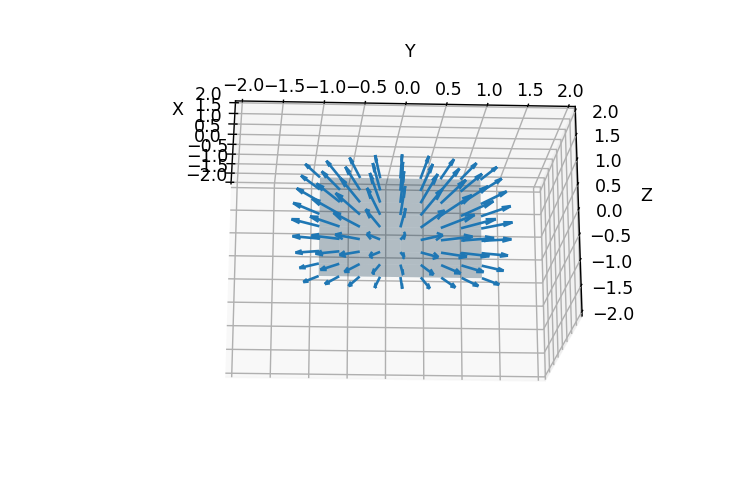

(-2, 2)

In [21]:
%matplotlib notebook
# define a new 3d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Max value used to scale the vectors.
Emax = np.max(  (Ex**2 + Ey**2 + Ez**2)**0.5 ) 

# create the plot
ax.quiver(x, Y, Z, Ex/Emax, Ey/Emax, Ez/Emax)   # E vectors
ax.plot_surface(x,Y,Z, alpha = 0.3)             # cube face

# add labels to the 3D axes object
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_xlim(-2,2); ax.set_ylim(-2,2); ax.set_zlim(-2,2)

## Calculate Flux

$$\Phi_E = \iint\limits_\textrm{surface} \vec{E}\cdot d\vec{A} = \iint\limits_\textrm{surface} \vec{E}\cdot \hat{n}\ dA$$

For the scenario above where it is the positive x face of a cube.

1. What is $\hat{n}$ for this specific problem (in math notation)?
1. What is $dA$ for this specific problem (in math notation)?

In [26]:
x = 1  # fixed x value (positive x face of cube)
yrange = np.linspace(-1, 1, 1000)
zrange = np.linspace(-1, 1, 1000)

Y, Z = np.meshgrid(yrange, zrange)

# dA calculation
dy = yrange[1] - yrange[0]  # Delta y in grid
dz = zrange[1] - zrange[0]  # Delta z in grid
dA = dy * dz   # little bit of area of a single grid point

# components of the normal vector
nx = 1
ny = 0
nz = 0

In [27]:
# E-field calculation (copied from above)

from scipy.constants import epsilon_0
const = 1/(4* np.pi* epsilon_0)
q = 1

R = (x**2 + Y**2 + Z**2) **0.5

Ex = const * q * x/ R**3
Ey = const * q * Y/ R**3
Ez = const * q * Z/ R**3

## Express the flux in terms of the variables for the E-field and the normal vectors

`Ex`, `Ey`, `Ez`, `nx`, `ny`, `nz`, `dA`

In [28]:
# meshgrid of flux values for each little square in grid
Dflux = (Ex*nx + Ey*ny + Ez*nz) * dA
flux_total = np.sum(Dflux)

In [29]:
print( flux_total )
print( flux_total * epsilon_0)

18844258768.930912
0.16685060642395427


In [30]:
1/6

0.16666666666666666